# Models v4 Onward

Imports

In [98]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

%matplotlib inline

Reading csvs

In [99]:
sub_df = pd.read_csv('data/submission_format.csv')
test_vals = pd.read_csv('data/test_set_values.csv')
train_labels = pd.read_csv('data/training_set_labels.csv')
train_vals = pd.read_csv('data/training_set_values.csv')
train_df = pd.read_csv('data/clean_train.csv')

### Viewing head, info, and some value_counts

In [100]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55973 entries, 0 to 55972
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         55973 non-null  int64  
 1   id                 55973 non-null  int64  
 2   amount_tsh         55973 non-null  float64
 3   date_recorded      55973 non-null  object 
 4   gps_height         55973 non-null  int64  
 5   longitude          55973 non-null  float64
 6   latitude           55973 non-null  float64
 7   wpt_name           55973 non-null  object 
 8   basin              55973 non-null  object 
 9   subvillage         55973 non-null  object 
 10  region             55973 non-null  object 
 11  region_code        55973 non-null  int64  
 12  district_code      55973 non-null  int64  
 13  lga                55973 non-null  object 
 14  ward               55973 non-null  object 
 15  population         55973 non-null  int64  
 16  permit             559

## Decision Tree with Dummy Attributes | 75.1%
'construction_year', 'waterpoint_type', 'quantity', 'water_quality', 'extraction_type', 'management', 'permit', 'basin', 'status_group'

In [101]:
dt_mini_df = train_df[['construction_year', 'waterpoint_type', 'quantity', 'water_quality',
                             'extraction_type', 'management', 'permit', 'basin', 'status_group']]

dt_mini_df = pd.get_dummies(dt_mini_df, columns=['waterpoint_type', 'water_quality', 'extraction_type', 'quantity',
                                                'management', 'permit', 'basin']).drop('extraction_type_other - mkulima/shinyanga', axis=1)
# print(dt_mini_df.columns)

X = dt_mini_df.drop('status_group', axis=1)
y = dt_mini_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

acc_dt_dummies = accuracy_score(y_test, y_pred)

print('The Decision Tree model with dummies has an accuracy of', round(acc_dt_dummies, 3)*100, '%')

The Decision Tree model with dummies has an accuracy of 76.0 %


In [132]:
top_feautures_df = dt_mini_df[["construction_year", "quantity_dry", "waterpoint_type_other", "extraction_type_other", "quantity_enough",                              
"waterpoint_type_communal standpipe",             
"management_vwc",                                 
"extraction_type_gravity",                        
"waterpoint_type_communal standpipe multiple", "status_group"]]   



In [133]:
top_feautures_df

,construction_year,quantity_dry,waterpoint_type_other,extraction_type_other,quantity_enough,waterpoint_type_communal standpipe,management_vwc,extraction_type_gravity,waterpoint_type_communal standpipe multiple,status_group
0,1999,0,0,0,1,1,1,1,0,functional
1,2010,0,0,0,0,1,0,1,0,functional
2,2009,0,0,0,1,0,1,1,1,functional
3,1986,1,0,0,0,0,1,0,1,non functional
4,0,0,0,0,0,1,0,1,0,functional
...,...,...,...,...,...,...,...,...,...,...
55968,1999,0,0,0,1,1,0,1,0,functional
55969,1996,0,0,0,1,1,1,1,0,functional
55970,0,0,0,0,1,0,1,0,0,functional
55971,0,0,0,0,0,0,1,0,0,functional


In [136]:

X = top_feautures_df.drop('status_group', axis=1)
y = top_feautures_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

acc_dt_dummies = accuracy_score(y_test, y_pred)

print('The Decision Tree model with dummies has an accuracy of', round(acc_dt_dummies, 3)*100, '%')

The Decision Tree model with dummies has an accuracy of 72.7 %


### Confusion Matrix

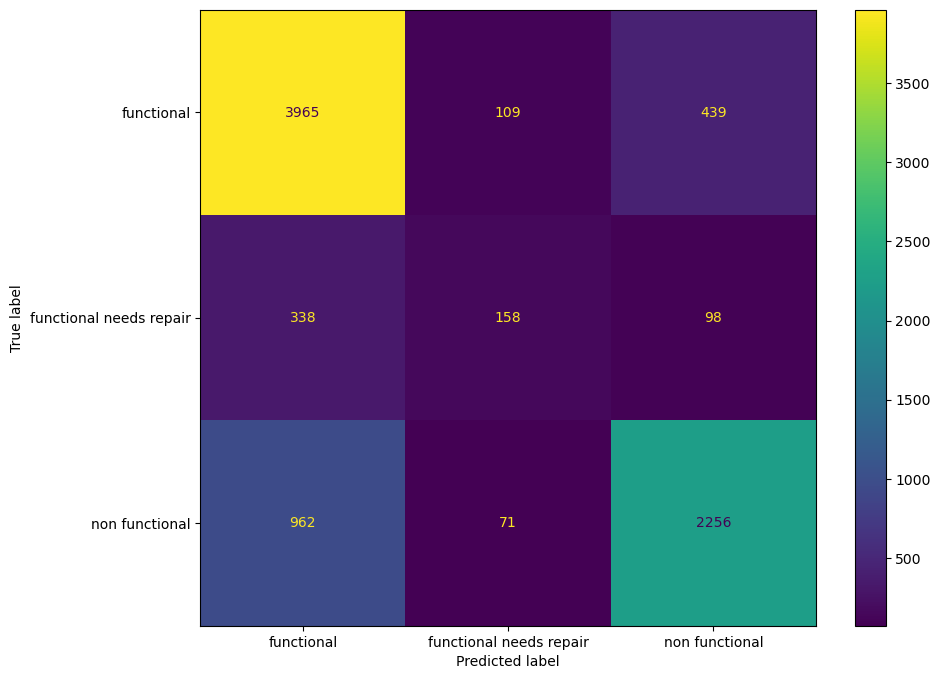

In [102]:
cm_plot = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=dt.classes_), display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(10,8))
cm_plot.plot(ax=ax)
plt.show()

In [103]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [115]:
forest = RandomForestClassifier(n_estimators=50, max_depth=30)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=50)

#training accuracy score



In [116]:
forest.score(X_train, y_train)


0.8312419866742333

In [117]:
# Test accuracy score
forest.score(X_test, y_test)

0.7666746069556932

In [107]:
forest.feature_importances_

array([2.42729766e-01, 5.96884127e-04, 2.18705639e-02, 1.89161901e-02,
       1.59909109e-04, 1.64038205e-02, 5.65098639e-03, 6.00330317e-02,
       3.11768234e-03, 1.40677622e-03, 2.30791345e-04, 3.32289608e-03,
       9.23143972e-03, 2.83025937e-03, 1.23119913e-02, 8.85710466e-03,
       4.07213251e-03, 6.00515648e-04, 4.82487233e-04, 2.02616987e-02,
       4.83989261e-03, 1.11403366e-03, 7.81152433e-03, 7.08738793e-03,
       1.43631825e-02, 4.84334920e-02, 5.26759783e-04, 1.73351241e-03,
       1.23168971e-03, 8.54645019e-03, 5.47291438e-03, 4.37285693e-04,
       8.87305028e-04, 1.47290432e-01, 4.42430504e-02, 2.23727844e-02,
       1.44298012e-02, 3.94250794e-03, 8.05968539e-03, 3.78409392e-03,
       5.26427545e-04, 6.02538951e-03, 8.53137648e-03, 1.05468181e-03,
       3.04497297e-03, 2.03433193e-02, 4.39153792e-03, 6.81526457e-03,
       5.57024828e-03, 1.09644020e-02, 1.68120348e-02, 1.65532113e-02,
       1.38268388e-02, 1.42266837e-02, 9.30065692e-03, 1.58391526e-02,
      

In [108]:
myClassifiers = pd.Series(forest.feature_importances_, index=X_train.columns)
myClassifiers.sort_values(ascending=False, inplace=True)
print(myClassifiers.head(20))

construction_year                              0.242730
quantity_dry                                   0.147290
waterpoint_type_other                          0.060033
extraction_type_other                          0.048433
quantity_enough                                0.044243
quantity_insufficient                          0.022373
waterpoint_type_communal standpipe             0.021871
management_vwc                                 0.020343
extraction_type_gravity                        0.020262
waterpoint_type_communal standpipe multiple    0.018916
basin_Lake Victoria                            0.017139
permit_False                                   0.016812
permit_True                                    0.016553
waterpoint_type_hand pump                      0.016404
basin_Lake Tanganyika                          0.015839
quantity_seasonal                              0.014430
extraction_type_nira/tanira                    0.014363
basin_Lake Nyasa                               0

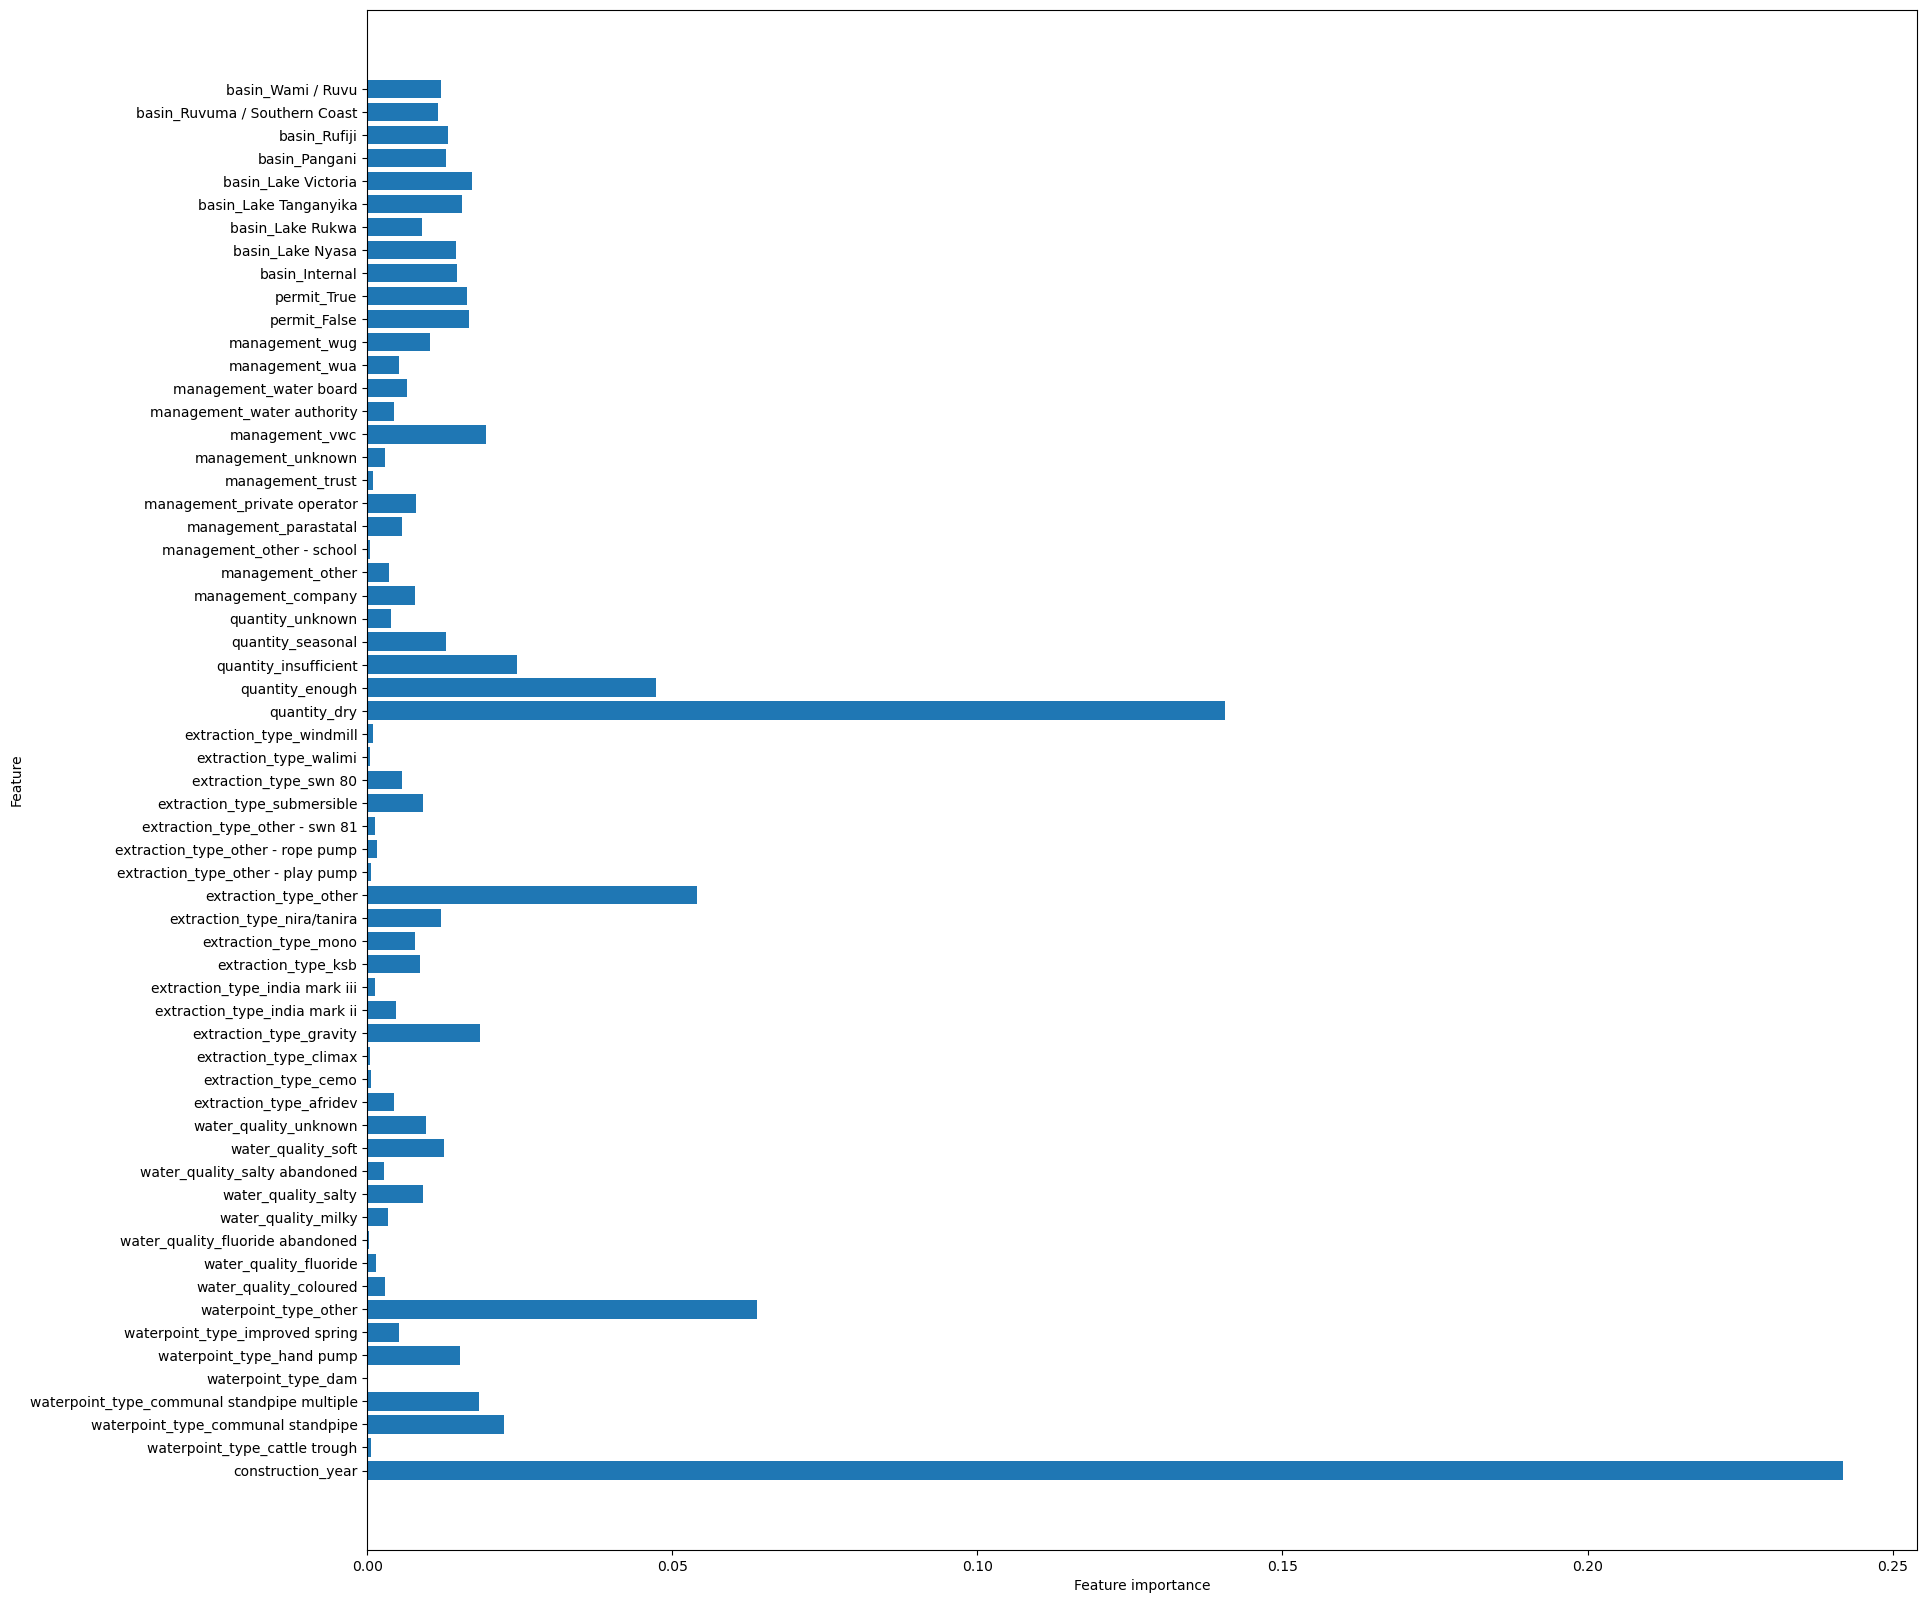

In [80]:
def plot_feature_importances(forest):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), forest.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(forest)

In [81]:
# Instantiate and fit a RandomForestClassifier
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features=10, n_estimators=5)

In [82]:
# First tree from forest_2
rf_tree_1 = forest_2.estimators_[0]

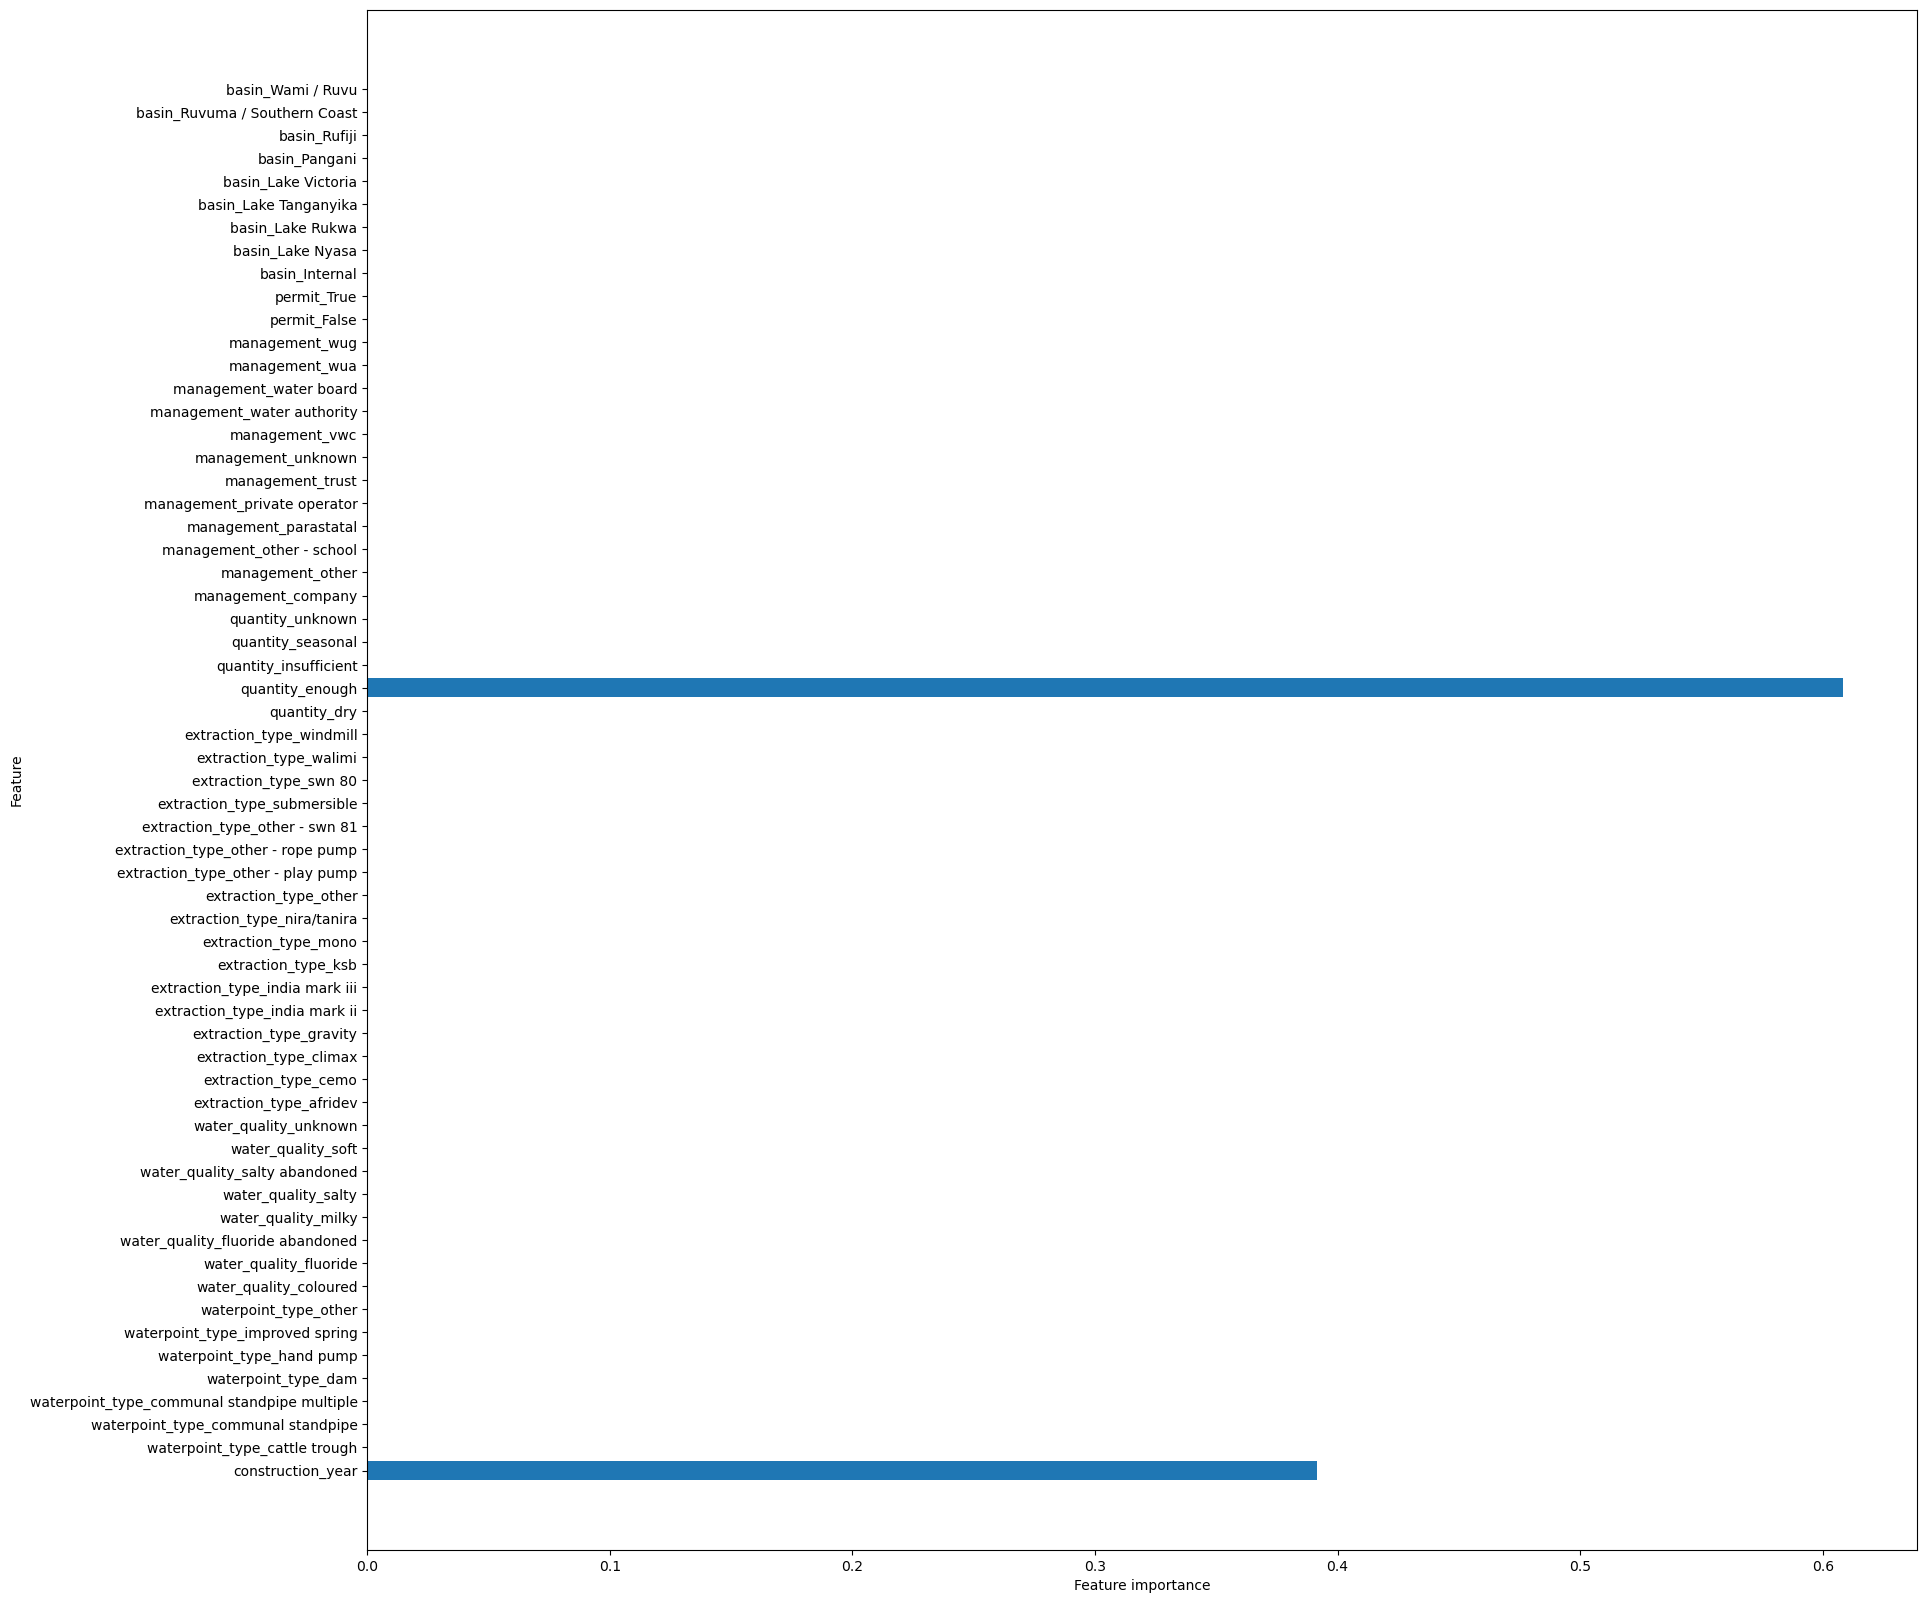

In [68]:
# Feature importance
plot_feature_importances(rf_tree_1)

In [69]:
# Second tree from forest_2
rf_tree_2 = forest_2.estimators_[1]

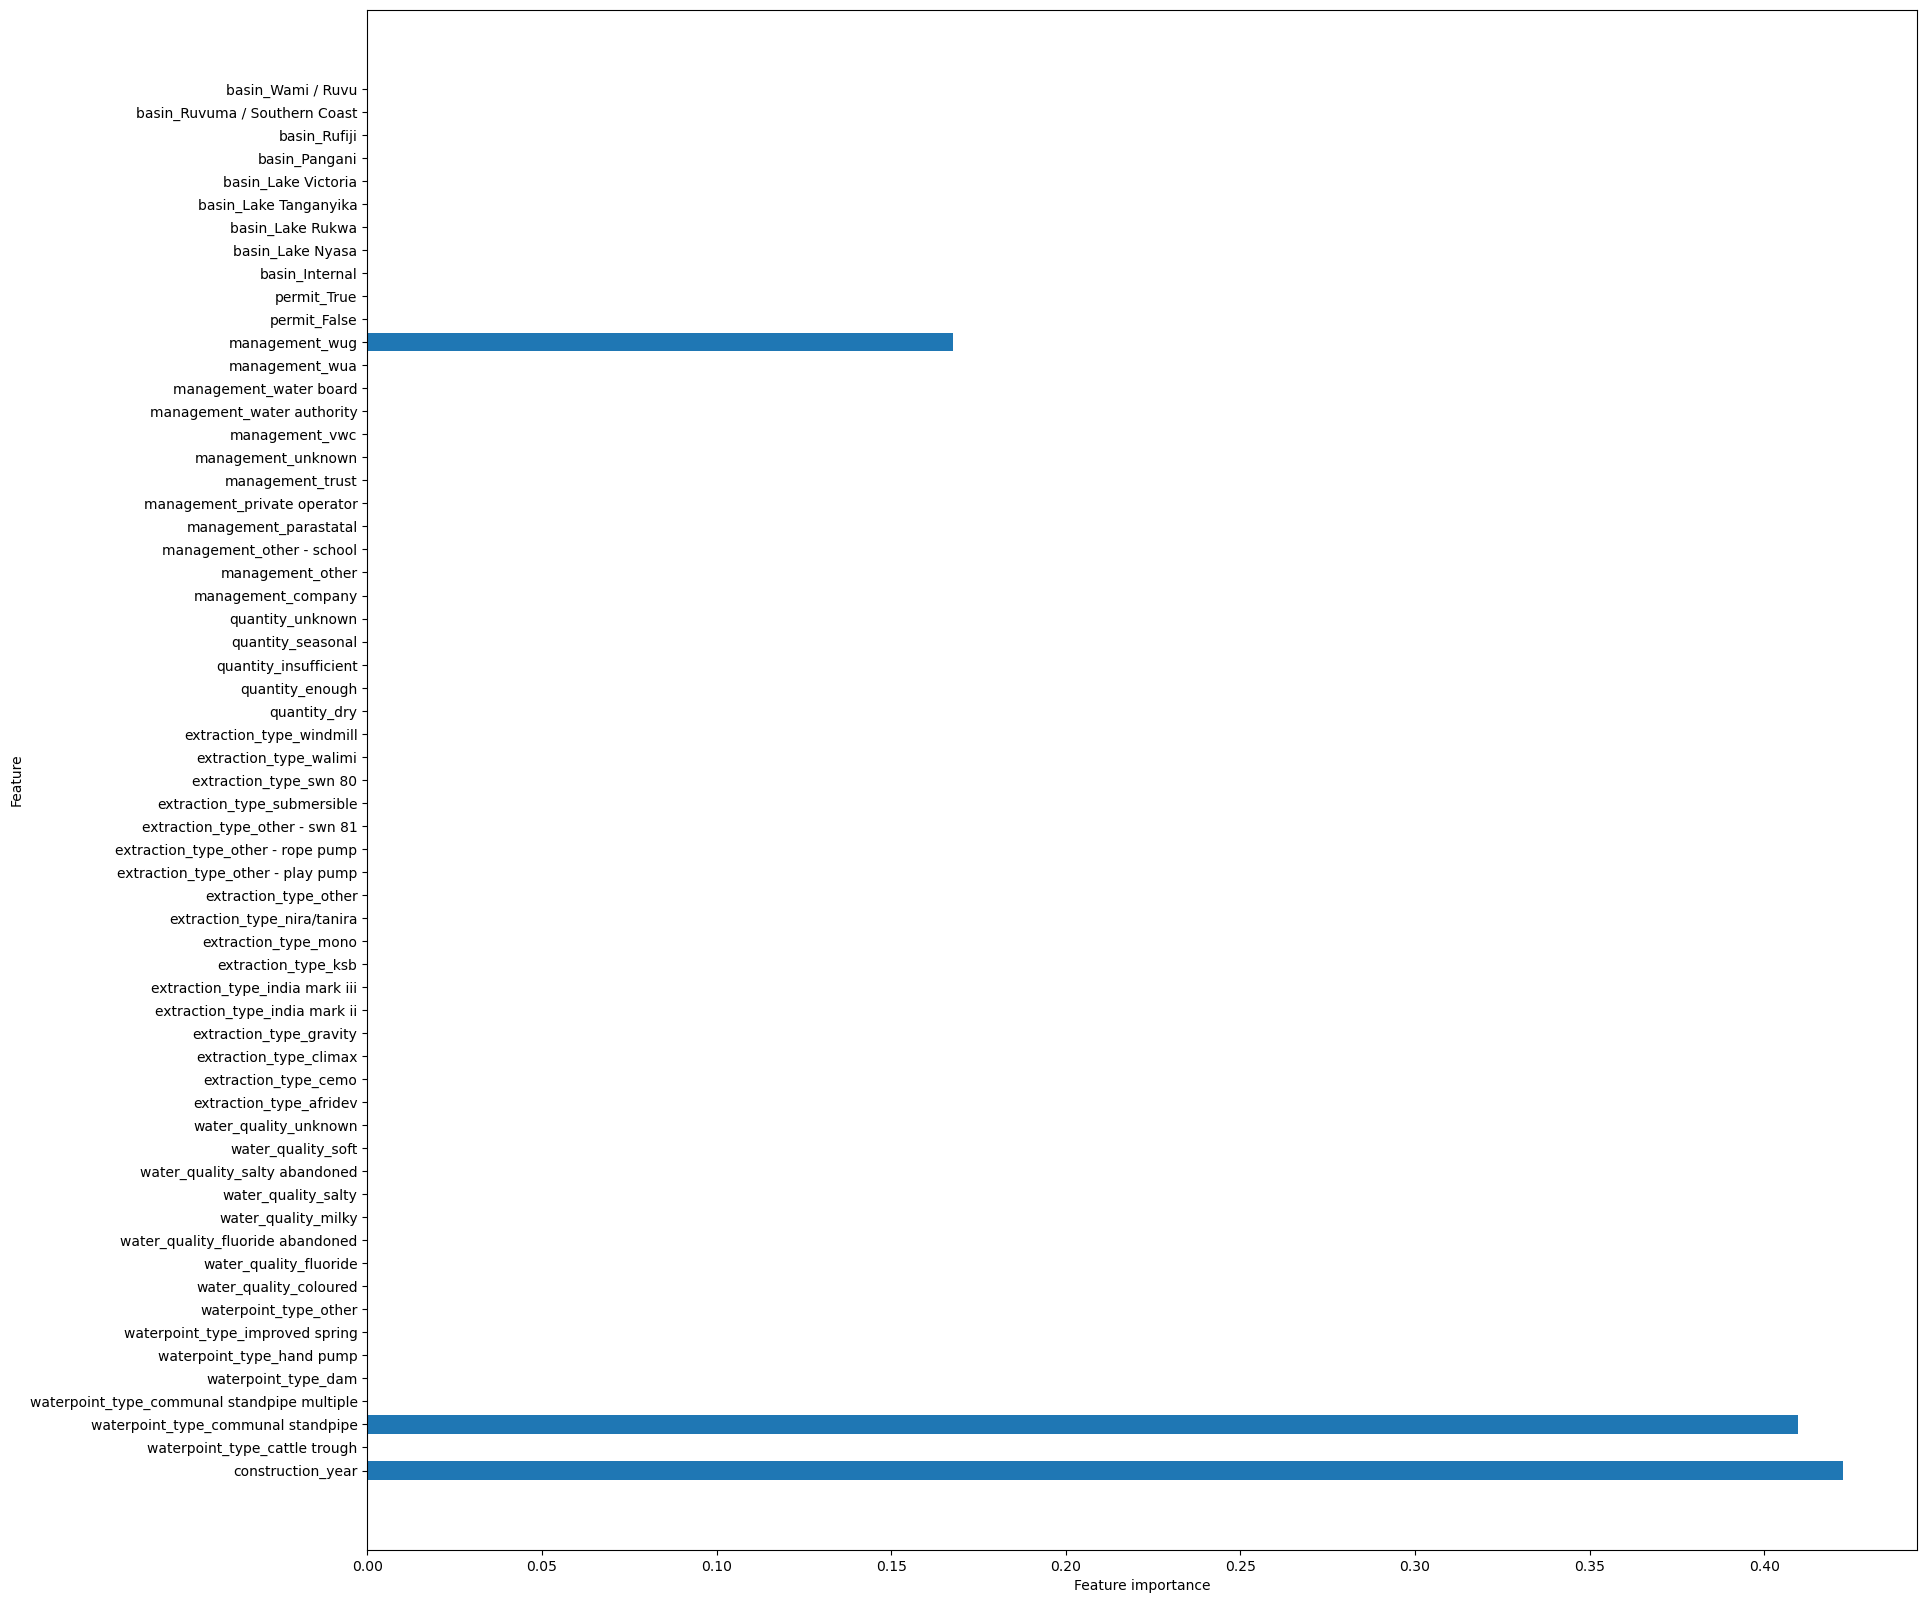

In [70]:
# Feature importance
plot_feature_importances(rf_tree_2)

# MAKING A SUBMISSION

Predicting on the test data and creating the csv file

In [12]:
test_vals_submit = pd.get_dummies(test_vals, columns=['waterpoint_type', 'water_quality', 'extraction_type', 
                                                      'quantity', 'management', 'permit', 'basin'])

y_pred_submit = dt.predict(test_vals_submit[['construction_year', 'waterpoint_type_cattle trough',
                                           'waterpoint_type_communal standpipe',
                                           'waterpoint_type_communal standpipe multiple', 'waterpoint_type_dam',
                                           'waterpoint_type_hand pump', 'waterpoint_type_improved spring',
                                           'waterpoint_type_other', 'water_quality_coloured',
                                           'water_quality_fluoride', 'water_quality_fluoride abandoned',
                                           'water_quality_milky', 'water_quality_salty',
                                           'water_quality_salty abandoned', 'water_quality_soft',
                                           'water_quality_unknown', 'extraction_type_afridev',
                                           'extraction_type_cemo', 'extraction_type_climax',
                                           'extraction_type_gravity', 'extraction_type_india mark ii',
                                           'extraction_type_india mark iii', 'extraction_type_ksb',
                                           'extraction_type_mono', 'extraction_type_nira/tanira',
                                           'extraction_type_other', 'extraction_type_other - play pump',
                                           'extraction_type_other - rope pump', 'extraction_type_other - swn 81',
                                           'extraction_type_submersible', 'extraction_type_swn 80',
                                           'extraction_type_walimi', 'extraction_type_windmill', 'quantity_dry',
                                           'quantity_enough', 'quantity_insufficient', 'quantity_seasonal',
                                           'quantity_unknown', 'management_company', 'management_other',
                                           'management_other - school', 'management_parastatal',
                                           'management_private operator', 'management_trust', 'management_unknown',
                                           'management_vwc', 'management_water authority',
                                           'management_water board', 'management_wua', 'management_wug',
                                           'permit_False', 'permit_True', 'basin_Internal', 'basin_Lake Nyasa',
                                           'basin_Lake Rukwa', 'basin_Lake Tanganyika', 'basin_Lake Victoria',
                                           'basin_Pangani', 'basin_Rufiji', 'basin_Ruvuma / Southern Coast',
                                           'basin_Wami / Ruvu']])

In [13]:
submission1_df = pd.concat([test_vals['id'].reset_index(drop=True), 
                            pd.Series(y_pred_submit).reset_index(drop=True)], 
                           axis=1).rename(columns={0:'status_group'})
submission1_df.rename(columns={0:'status_group'})

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


### Creating submission csv files

In [ ]:
sub_name = ''
# submission1_df.to_csv('submissions/submission' + sub_name + '.csv', index=False)  